In [11]:
import geopandas
import pandas
import starepandas
import pystare
import shapely
import matplotlib.pyplot as plt

In [12]:
cities = {'name': ['midway', 'Fiji', 'Baker', 'honolulu'],
          'lat': [28.2, -17.8,  0.2, 21.3282956], 
          'lon': [-177.35, 178.1, -176.7, -157.9]}
                   
sdf = starepandas.STAREDataFrame(cities)
sids = starepandas.sids_from_xy(sdf.lon, sdf.lat, resolution=1)
sdf.set_sids(sids, inplace=True)
trixels = sdf.make_trixels(wrap_lon=False)
sdf.set_trixels(trixels, inplace=True)

<AxesSubplot:>

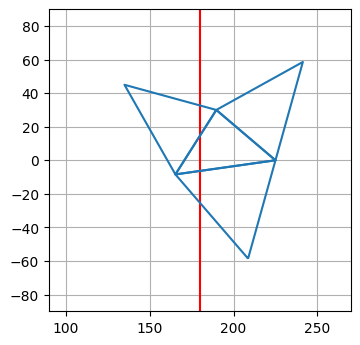

In [13]:
fig, ax = plt.subplots(dpi=100)
ax.grid(True)

antimeridian = shapely.geometry.LineString([(180,-90), (180,90)])

ax.plot(*antimeridian.xy, color='red')
ax.set_ylim(-90,90)
ax.set_xlim(90,270)

sdf.plot(ax=ax)

In [14]:
split_geoms = sdf.split_antimeridian(inplace=False)
max(max(split_geoms.iloc[0][0].exterior.xy))

180.0

<AxesSubplot:>

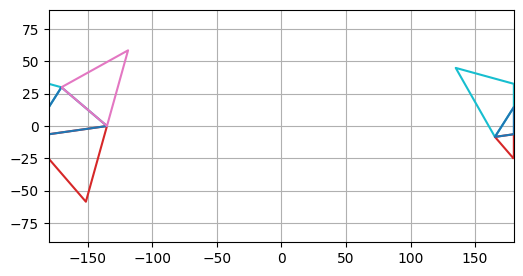

In [15]:
fig, ax = plt.subplots(dpi=100)
ax.grid(True)

ax.set_ylim(-90,90)
ax.set_xlim(-180,180)

sdf.split_antimeridian(inplace=True)

sdf.plot(ax=ax, column='name')

# Polygons

In [16]:
sdf = starepandas.STAREDataFrame(sids=[sids])
sdf.set_trixels(sdf.make_trixels(wrap_lon=False), inplace=True)

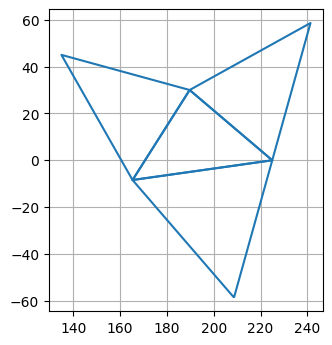

In [17]:
fig, ax = plt.subplots(dpi=100)
ax.grid(True)
sdf.plot(ax=ax)
sdf.set_geometry('trixels', inplace=True)

In [18]:
sdf[sdf._trixel_column_name]

0    MULTIPOLYGON (((189.736 30.000, 135.000 45.000...
Name: trixels, dtype: geometry

In [20]:
s = []
for row in sdf[sdf._trixel_column_name]:
    if row.geom_type == 'Polygon':
        row = [row]
    s.append(geopandas.GeoSeries(list(row)).unary_union)

In [21]:
split = geopandas.GeoSeries(s)

<AxesSubplot:>

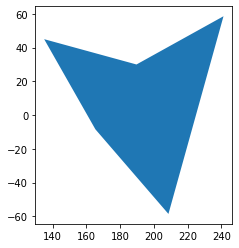

In [22]:
split.plot()

<AxesSubplot:>

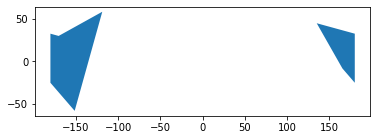

In [23]:
sdf.split_antimeridian().plot()

In [14]:
sdf2 =sdf